# Lead Scoring Case Study

In [513]:
# Importing all necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [514]:
# Reading the dataset

edu_df1=pd.read_csv('/content/Leads.csv')

edu_df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data Understanding

In [515]:
# Shape of the dataset

edu_df1.shape

(9240, 37)

The dataset is having 9240 rows and 37 columns

In [516]:
# let's view the data information like what are thew datatypes of the variables

edu_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As we can see from the above, there are 7 numerical variables columns and remaining 30 columns are having categorical variables.

In [517]:
# Let's describe the data and have some statistical idea about the dataset like outlers, mean, std etc.

edu_df1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


As we can see from the above table, some variable columns like 'totalVisits','Total Time Spent on Website' and 'Page Views Per Visit' are having outliers while others not so much.

Now, from our above observations from two tables we can see that there are some count mismatch and also some columns are redundant. Hence, first we will try to remove those redundant columns and after that we will check the missing values in the dataset. 

# Cleaning the dataset

In [518]:
# Dropping redundant columns like 'Prospect ID','Lead Number','Country',
# 'I agree to pay the amount through cheque' and 'a free copy of Mastering The Interview'

red_cols=['Prospect ID','Lead Number','Country','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview','City']

edu_df=edu_df1.drop(red_cols,1)



In [519]:
edu_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,Interested in other courses,Low in Relevance,No,No,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,Ringing,NaN,No,No,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,Ringing,Not Sure,No,No,Select,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,Will revert after reading the email,Might be,No,No,Select,02.Medium,01.High,15.0,18.0,Modified


Now, there are some columns/categorical variables having label as 'Select' which means the customer was not selected any option hence it is better to put it as null value - Because there was no suitable option present to select for the customer searching for. 

**Let's find out which columns/categories is having 'Select' label**

In [520]:
# Creating a for loop and the required columns are appended into a new list

cols=list(edu_df.columns)
test=['Select']
text=[]
for i in range(len(cols)):
    if len(edu_df[cols[i]].isin(test).unique())>1:
        text.append(cols[i])
  
text # column names having label 'Select'

['Specialization', 'How did you hear about X Education', 'Lead Profile']

The columns' having 'Select' as a lable are **'Specialization', 'How did you hear about X Education', 'Lead Profile'.**

In [521]:
# Now replacing label 'Select' with nan values

# Copying the required columns in sepearate DataFrame

df_1=pd.DataFrame(edu_df['Specialization'])
df_2=pd.DataFrame(edu_df['How did you hear about X Education'])
df_3=pd.DataFrame(edu_df['Lead Profile'])

In [522]:
# Replacing 'Select' label with nan values

df_1.loc[df_1['Specialization']=='Select', 'Specialization']=None

df_2.loc[df_2['How did you hear about X Education']=='Select', 'How did you hear about X Education']= None

df_3.loc[df_3['Lead Profile']=='Select','Lead Profile']= None 

In [523]:
# After replacing in temporary dataframe, we update our original dataset with new set of data from dataset df_1

edu_df['Specialization']=df_1['Specialization']
edu_df['How did you hear about X Education']=df_2['How did you hear about X Education']
edu_df['Lead Profile']=df_3['Lead Profile']

**Now, we have replaced the label 'Select' with null values**

In [524]:
# Check for missing values

round(edu_df.isnull().sum()/len(edu_df)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

From above percentage of columns shows that some columns are having **more than 30% of missing values**, so it is better to remove these columns because it is **not a great move** if we are imputing more than approx. 30% of data based on **predictions** and **assumptions**.

In [525]:
# Droping Columns having more than 30% of missing values

drop_cols=edu_df.isnull().sum()
drop_cols=drop_cols[drop_cols.values/len(edu_df)>0.30]
len(drop_cols)

9

Columns we found that are having 30% of missing values in the dataset, so let's get rid of them.

In [526]:
# Dropping 9 columns and checking the remaining columns for missing values

drop_columns=list(drop_cols.keys())
edu_df=edu_df.drop(drop_columns,1)  
round(edu_df.isnull().sum()/len(edu_df)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

The 9 columns were removed which were having **more than 30% of missing values**.

Now, for columns having **below 30% missing values** - let's **impute maximum number of occurences** for a particluar column where missing values are found.

In [527]:
# Let's start with first columns of missing values

edu_df['Lead Source'].value_counts().head(5)   # Lead Source column

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

**Google** is having highest number of occurences, hence we will impute the missing values with label 'Google'

In [528]:
# TotalVisits column

edu_df['TotalVisits'].value_counts().head(5)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

**0.0** is having highest number of occurences, hence we will impute the missing values with label '0.0'

In [529]:
edu_df['Page Views Per Visit'].value_counts().head(5)

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

**0.0** is having highest number of occurences, hence we will impute the missing values with label '0.0'

In [530]:
edu_df['Last Activity'].value_counts().head(5)

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

**Email Opened** is having highest number of occurences, hence we will impute the missing values with label 'Email Opened'

In [531]:
edu_df['What is your current occupation'].value_counts().head(5)

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Name: What is your current occupation, dtype: int64

**Unemployed** is having highest number of occurences, hence we will impute the missing values with label 'Unemployed'

In [532]:
edu_df['What matters most to you in choosing a course'].value_counts().head(5)

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

**Better Career Prospects** is having highest number of occurences, hence we will impute the missing values with label 'Better Career Prospects'

In [533]:
# Now, imputing these values in our missing values dataset for respective categories

missing_values={'Lead Source':'Google','TotalVisits':'0.0','Page Views Per Visit':'0.0','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed','What matters most to you in choosing a course':'Better Career Prospects'}

edu_df=edu_df.fillna(value=missing_values)


In [534]:
edu_df.isnull().sum()  # chekcing for missing values after imputing values to the missing area

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

**Now all columns are having no missing values, we are good to go for our next analysis**

In [535]:
edu_df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

We found one column **'Lead Source'** is having same label name **'Google'** but in different format**('google')** so we need to make them in a same format hence using below commands.

In [536]:
# Applying lambda to captilize the first character of the column 'Lead Source'

edu_df['Lead Source']=edu_df['Lead Source'].apply(lambda x:x.capitalize())

edu_df['Lead Source'].value_counts()


Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Social media            2
Live chat               2
Press_release           2
Pay per click ads       1
Blog                    1
Welearn                 1
Welearnblog_home        1
Youtubechannel          1
Testone                 1
Nc_edm                  1
Name: Lead Source, dtype: int64

Now, all data labels are in good shape and this is our final cleaning step of the dataset, we will proceed to our next step which is **Data Transformation**.

# Data Transformation

Assigning numerical variables to categories with **'Yes' to 1 and 'No' to 0** or **converting binary variables (Yes/No) to (1/0)**

In [537]:
# Yes : 1 , No : 0

category={"No":0,"Yes":1}    # creating dictionary for two categories

# Column 'Do Not Email'

edu_df['Do Not Email']=edu_df['Do Not Email'].map(category)

# Column 'Do Not Call'

edu_df['Do Not Call']=edu_df['Do Not Call'].map(category)

# Column 'Search'

edu_df['Search']=edu_df['Search'].map(category)

# Column 'Magazine'

edu_df['Magazine']=edu_df['Magazine'].map(category)

# Column 'Newspaper Article'

edu_df['Newspaper Article']=edu_df['Newspaper Article'].map(category)

# Column 'X Education Forums'

edu_df['X Education Forums']=edu_df['X Education Forums'].map(category)

# Column 'Newspaper'

edu_df['Newspaper']=edu_df['Newspaper'].map(category)

# Column 'Digital Advertisement'

edu_df['Digital Advertisement']=edu_df['Digital Advertisement'].map(category)

# Column 'Through Recommendations'

edu_df['Through Recommendations']=edu_df['Through Recommendations'].map(category)

# Column 'Receive More Updates About Our Courses'

edu_df['Receive More Updates About Our Courses']=edu_df['Receive More Updates About Our Courses'].map(category)

# Column 'Update me on Supply Chain Content'

edu_df['Update me on Supply Chain Content']=edu_df['Update me on Supply Chain Content'].map(category)

# Column 'Get updates on DM Content'

edu_df['Get updates on DM Content']=edu_df['Get updates on DM Content'].map(category)

After converting the binary categories from 'Yes' to 1 and 'No' to 0, **we will use now dummy variables for mutiple levels of categories.**

In [538]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   int64 
 3   Do Not Call                                    9240 non-null   int64 
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

In [539]:
# Creating a dummy variables for 8 categories and dropping the first level.

dummy=pd.get_dummies(edu_df[['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                             'What matters most to you in choosing a course','Last Notable Activity']],drop_first=True)

# Adding these dummies to our original dataset

edu_df=pd.concat([edu_df,dummy],axis=1)

edu_df.shape

(9240, 83)

**Now, Removing duplicate columns or repeated columns**

In [540]:
# We have created dummies for below categories hence removing the original column

duplicates=['Lead Origin','Lead Source','Last Activity','What is your current occupation',
            'What matters most to you in choosing a course','Last Notable Activity']


edu_df=edu_df.drop(duplicates,1)

edu_df.shape

(9240, 77)

In [541]:
# Dropping redundant variables

redundant=['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine']

edu_df=edu_df.drop(redundant,1)

In [542]:
# Converting some categories to numercial as they are imported as an 'Object'

edu_df[['TotalVisits','Page Views Per Visit']]=edu_df[['TotalVisits','Page Views Per Visit']].astype('float64')

edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

**From above it states that all variables are numericals**

## Checking for Outliers

In [543]:
round(edu_df.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,...,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.00,0.39,3.39,487.70,2.33,0.00,0.00,0.00,0.00,...,0.00,0.00,0.37,0.02,0.03,0.00,0.24,0.00,0.01,0.00
std,0.27,0.01,0.49,4.84,548.02,2.16,0.04,0.01,0.01,0.01,...,0.01,0.04,0.48,0.14,0.18,0.01,0.42,0.06,0.07,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
35%,0.00,0.00,0.00,2.00,98.00,1.50,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,3.00,248.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
55%,0.00,0.00,0.00,3.00,305.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,1.00,5.00,936.00,3.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
95%,1.00,0.00,1.00,10.00,1562.00,6.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


As we can see there are outliers in 2 variables **'TotalVisits' and 'Page Views Per Visit'**.

Let's visualize the outliers using boxplot to understand the outliers.

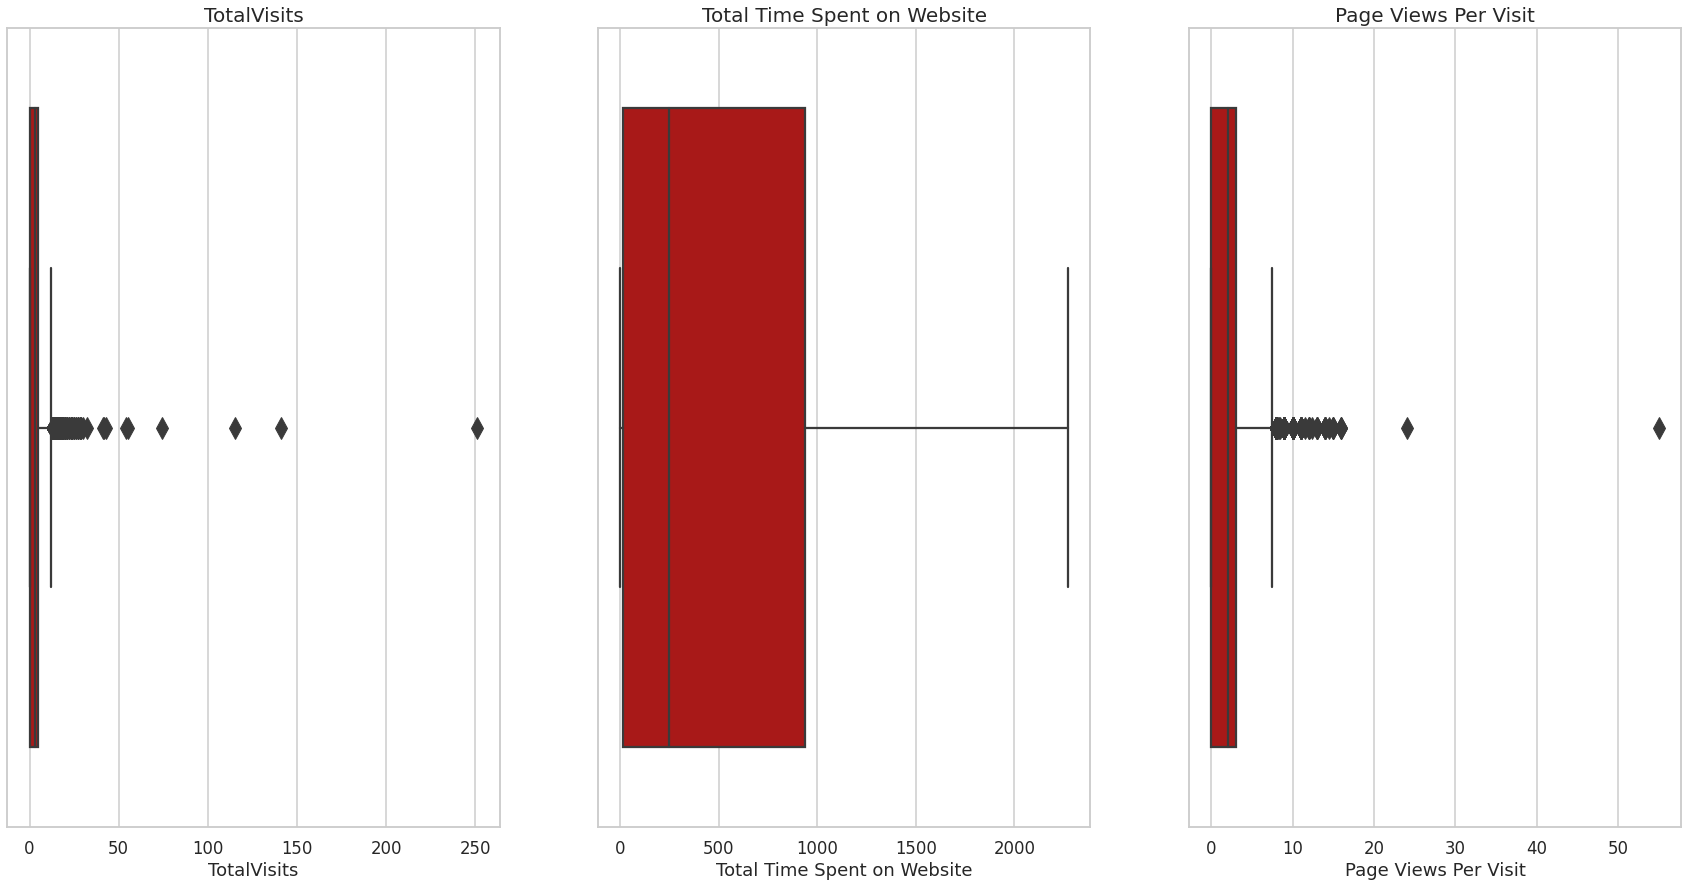

In [544]:

# Setting size of figure, context and gridlines

plt.figure(figsize=(30,50))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

# Title names for the columns in the dataset

col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i],fontsize=20)
    sns.boxplot(x=edu_df[col[i]],data=edu_df,palette='gist_heat',orient='v',fliersize=15)  # using boxplot
        

  

From the above boxplots we can now confirm that we have two outlier variables in our dataset **('TotalVisits' and 'Page Views Per Visit')**. Now as per business requirement we cannot drop these outliers because it may impact our analysis/model so we will **create bins** for these two outliers.

### Creating bins

In [545]:
# For 'TotalVisits' variable

# As we have range from 0 to 251 for'TotalVisits' variable

ranges_total_visits={'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,
                     'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits.keys()))):
    edu_df[list(ranges_total_visits.keys())[i]]=edu_df['TotalVisits'].map(lambda x: 1 if (x < list(ranges_total_visits.values())[i] and x >= (list(ranges_total_visits.values())[i] - 50)) else 0)

In [546]:
# For 'Page Views Per Visit' variable

# As we have range from 0 to 55 for'Page Views Per Visit' variable

ranges_total_visits_1={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,
                     'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits_1.keys()))):
    edu_df[list(ranges_total_visits_1.keys())[i]]=edu_df['Page Views Per Visit'].map(lambda x: 1 if (x < list(ranges_total_visits_1.values())[i] and x >= (list(ranges_total_visits_1.values())[i] - 10)) else 0)

From above, creating bins surely removed the outliers and hence we are now good to go. Before going to another step let's remove redundant columns/varaibles. 

In [547]:
redundant=['TotalVisits','Page Views Per Visit','TotalVisits_150_200','TotalVisits_200_250','Page Views Per Visit_30_40','Page Views Per Visit_40_50']

edu_df=edu_df.drop(redundant,axis=1)

edu_df.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,305,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


# Data Preparation

### Train-Test Split 

In [548]:
# Importing train-test-split method from sklearn - model selection

from sklearn.model_selection import train_test_split

In [549]:
# Separating target varaible from dependent variable

y=edu_df['Converted']     # putting target varaible 'Converted' to a new series 'y'

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [550]:
# Putting dependent variable in a new dataset called 'X'

X=edu_df.drop('Converted',1)

X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,674,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0,0,305,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1428,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [551]:
# Splitting the datset into train and test dataset

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Standardization

In [552]:
# Importing Standard Scaler method from sklearn - preprocessing library

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()  # Creating an object

In [553]:
# Now, Scalling the 'Total Time Spent on Website' variables with standard scaler and fitting - tranforming the X - train dataset

X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])

X_train.head()


,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
1871,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6795,0,0,0.005716,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8105,0,0,1.365219,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3934,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [554]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.53896103896104

We have conversion rate of almost 39%

### Correlation of the dataset

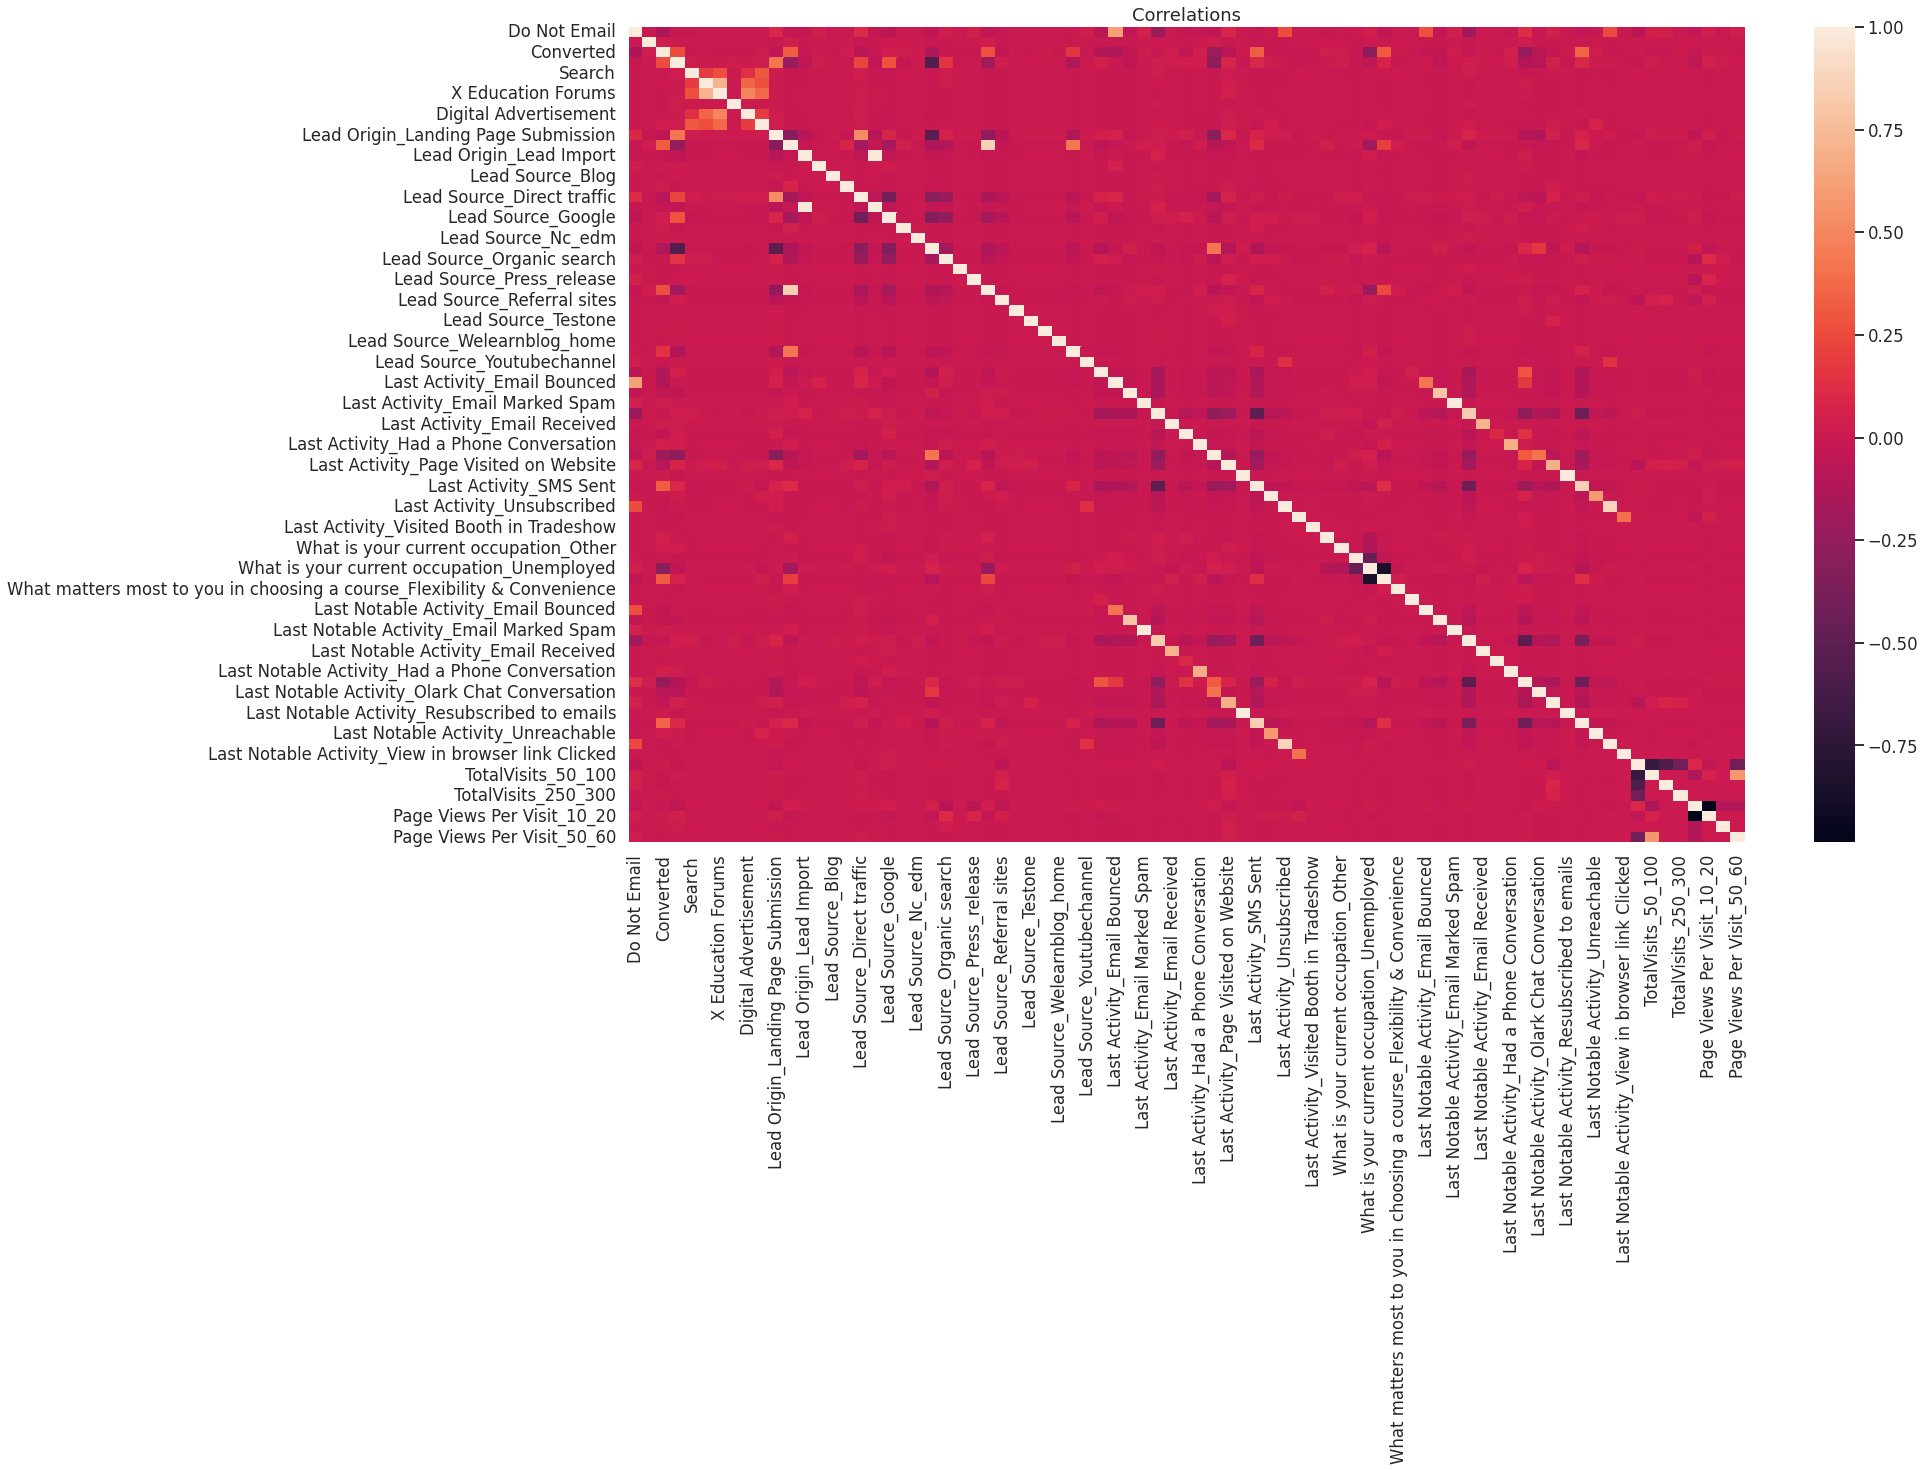

In [555]:
# setting the figure size

plt.figure(figsize=(25,15))

# setting the title

plt.title('Correlations')

# Plotting a heatmap

sns.heatmap(edu_df.corr(method='spearman'))

plt.show()

From the above heatmap, we saw that there are two variables having high correlation, so we going to drop them.

**Dropping highly correlated dummy variable/categories**

In [556]:
corr_dummy=['Lead Source_Olark chat','What is your current occupation_Unemployed']

X_train=X_train.drop(corr_dummy,1)      # dropping from X train set

X_test=X_test.drop(corr_dummy,1)       # dropping from X test set

### Checking again the correlation of the dataset

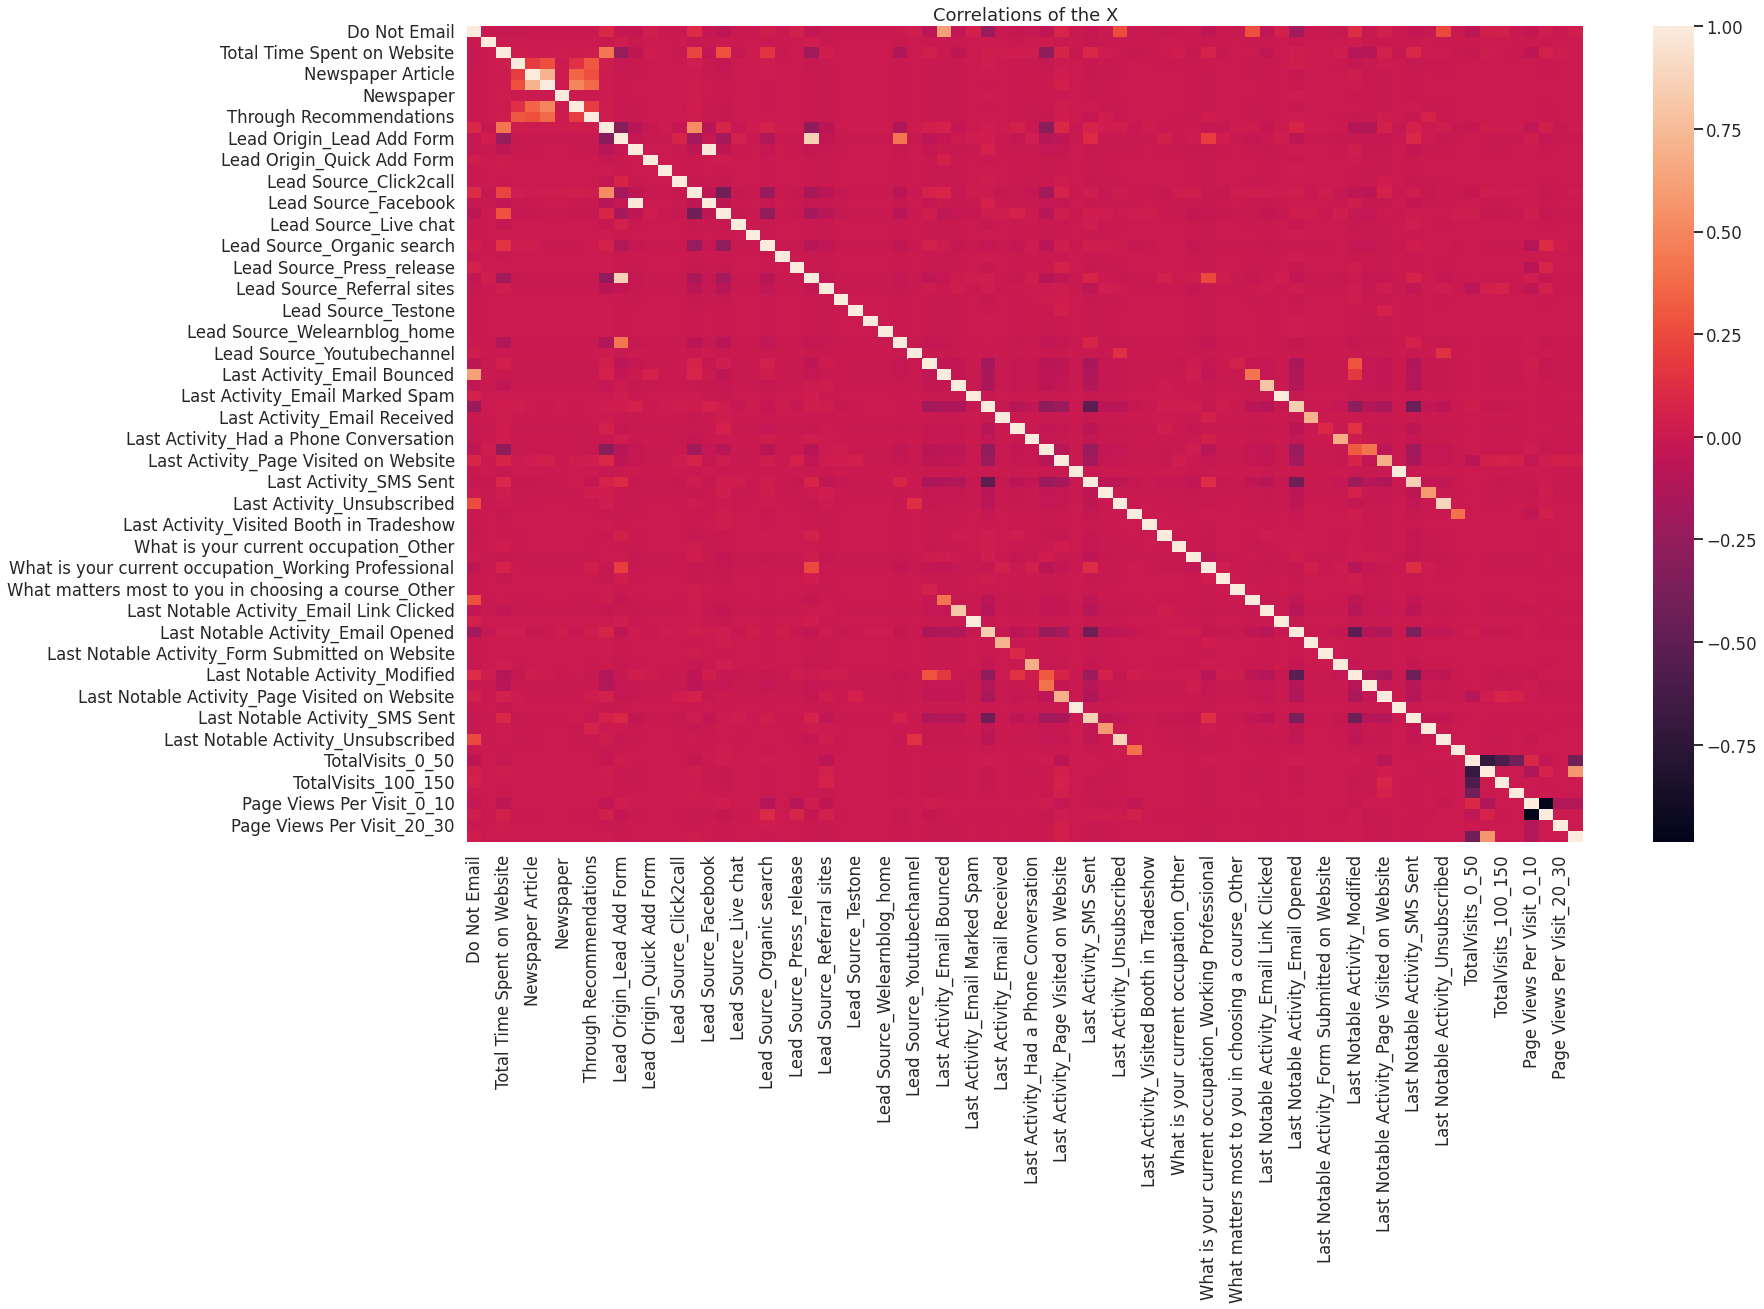

In [557]:
# setting the figure size

plt.figure(figsize=(25,15))

# setting the title

plt.title('Correlations of the X')

# Plotting a heatmap

sns.heatmap(edu_df[X_train.columns].corr(method='spearman'))

plt.show()

Now, both of them are removed and new correlation is shown above by heatmap, We will now proceed with building our model based on the p-values and VIFs, we will again check for correlation as from above heatmap it is difficult to spot the highly correlated variables.

# Building a Model

In [558]:
# importing necessary library

import statsmodels.api as sm

In [559]:
logis=sm.GLM(y_train,(sm.add_constant(X_train)),familt=sm.families.Binomial())
logis.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6398
Model Family:                Gaussian   Df Model:                           69
Link Function:               identity   Scale:                         0.13679
Method:                          IRLS   Log-Likelihood:                -2709.0
Date:                Tue, 24 Jan 2023   Deviance:                       875.16
Time:                        15:42:15   Pearson chi2:                     875.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    7.727e+11   9.73e+11      0.794      0.427   -1.13e+12    2.68e+12
Do Not Email                                                               -0.1236      0.025     -5.044      0.000      -0.172      -0.076
Do Not Call                                                                 0.4937      0.262      1.884      0.060      -0.020       1.007
Total Time Spent on Website                                                 0.1835      0.005     35.222      0.000       0.173       0.194
Search                                                                      0.0875      0.121      0.721      0.471      -0.150       0.325
Newspaper Article                                                           0.6341      0.371      1.711      0.087      -0.092       1.360
X Education Forums                                                         -0.7048      0.611     -1.154      0.248      -1.902       0.492
Newspaper                                                                  -0.6876      0.370     -1.857      0.063      -1.413       0.038
Digital Advertisement                                                      -0.3821      0.262     -1.459      0.144      -0.895       0.131
Through Recommendations                                                     0.1408      0.157      0.895      0.371      -0.168       0.449
Lead Origin_Landing Page Submission                                        -0.0251      0.014     -1.854      0.064      -0.052       0.001
Lead Origin_Lead Add Form                                                   0.4842      0.071      6.794      0.000       0.345       0.624
Lead Origin_Lead Import                                                     0.1785      0.264      0.675      0.500      -0.340       0.697
Lead Origin_Quick Add Form                                                  0.3400      0.371      0.916      0.360      -0.388       1.068
Lead Source_Blog                                                           -0.4808      0.370     -1.298      0.194      -1.207       0.245
Lead Source_Click2call                                                     -0.1589      0.226     -0.704      0.481      -0.601       0.283
Lead Source_Direct traffic                                                 -0.1740      0.020     -8.676      0.000      -0.213      -0.135
Lead Source_Facebook                                                       -0.3497      0.265     -1.322      0.186      -0.868       0.169
Lead Source_Google                                                         -0.1202      0.017     -7.050      0.000      -0.154      -0.087
Lea

From the above summary presented by generalizing linear model, we can tell that there are so many variable with insignificant p-values. Here we will **use rfe** for feature selection as we have 70 variables and checking one by one is not an efficient way to do so.

## Using RFE

In [560]:
# Importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg=LogisticRegression()                 # creating an object

## Running RFE with two different variables count to find best model

### RFE Test - 1

In [561]:
# Running rfe for 19 variables

rfem = RFE(logreg, n_features_to_select=19)

rfem = rfem.fit(X_train,y_train)   # fitting 

In [562]:
rfem.support_  # checking for ture and false assigned to the variables after rfe

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [563]:
# selecting columns only which are 'True' in rfem.support_ i.e True columns were selected for creating a model

col=X_train.columns[rfem.support_]

X_train_1=sm.add_constant(X_train[col])    # Adding constant

In [564]:
# creating 1st model after RFE

logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())

reg1=logis1.fit()

print(reg1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.1
Date:                Tue, 24 Jan 2023   Deviance:                       5358.3
Time:                        15:42:22   Pearson chi2:                 7.26e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.


## Calculating VIF

In [565]:
# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [566]:
# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X_train_1[col].columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X_train_1[col].values,i) for i in range(X_train_1[col].shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif   # Viewing the dataset

,Features,VIF
16,Last Notable Activity_Modified,2.58
0,Do Not Email,1.89
10,Last Activity_Olark Chat Conversation,1.82
9,Last Activity_Email Bounced,1.80
4,Lead Source_Google,1.79
3,Lead Source_Direct traffic,1.73
14,Last Notable Activity_Email Opened,1.73
2,Lead Origin_Lead Add Form,1.46
17,Last Notable Activity_Olark Chat Conversation,1.35
5,Lead Source_Organic search,1.30


**As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset.**

As expained before we will drop the highest in-significant features i.e **'What is your current occupation_Housewife'** having 0.999 p - value.

In [567]:
# Dropping the most insignificant values ('What is your current occupation_Housewife') and constant

X_train_2=X_train_1.drop(['const','What is your current occupation_Housewife'],1)

In [568]:
# Creating a new model

X_train_2=sm.add_constant(X_train_2)                              # Adding constant
logis2=sm.GLM(y_train,X_train_2,families=sm.families.Binomial())  # Using GLM, creating model
reg2=logis2.fit()                                                 # Fitting our model
print(reg2.summary())                                                   # Showing the summary of the model createdprint

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Gaussian   Df Model:                           18
Link Function:               identity   Scale:                         0.13833
Method:                          IRLS   Log-Likelihood:                -2770.9
Date:                Tue, 24 Jan 2023   Deviance:                       892.07
Time:                        15:42:23   Pearson chi2:                     892.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Again, we can see from above summary that variable **'Last Notable Activity_Had a Phone Conversation'** is in-significant hence dropping it and recreating a new model

In [569]:
# Dropping the most insignificant values ('Last Notable Activity_Had a Phone Conversation') and constant

X_train_3=X_train_2.drop(['const','Last Notable Activity_Had a Phone Conversation'],1)

In [570]:
# Recreating a new model

X_train_3=sm.add_constant(X_train_3)                                # Adding constant
logis3=sm.GLM(y_train,X_train_3,families=sm.families.Binomial())    # Using GLM, creating model
reg3=logis3.fit()                                                   # Fitting our model
print(reg3.summary())                                                 # Showing the summary of the model created

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Gaussian   Df Model:                           17
Link Function:               identity   Scale:                         0.13839
Method:                          IRLS   Log-Likelihood:                -2772.9
Date:                Tue, 24 Jan 2023   Deviance:                       892.63
Time:                        15:42:23   Pearson chi2:                     893.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Again, from above summary we can see that one variable **'Last Activity_Email Bounced'** is insignificant hence dropping from the dataset.

In [571]:
# Dropping the most insignificant values ('Last Notable Activity_Email Bounced') and constant

X_train_4=X_train_3.drop(['const','Last Activity_Email Bounced'],1)

In [572]:
# Recreating a new model

X_train_4=sm.add_constant(X_train_4)                              # Adding constant
logis4=sm.GLM(y_train,X_train_4,families=sm.families.Binomial())  # Using GLM, creating model
reg4=logis4.fit()                                                 # Fitting our model
print(reg4.summary())                                                   # Showing the summary of the model created

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                         0.13845
Method:                          IRLS   Log-Likelihood:                -2774.8
Date:                Tue, 24 Jan 2023   Deviance:                       893.15
Time:                        15:42:23   Pearson chi2:                     893.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Now, from the above summary we can say that all the variables present in this model are **significant** as no variables is having p - value greater than 5% hence we can proceed with our next step

## Creating VIF

After creating a model with no in significant features lets check the VIF i.e multicollinearity as we have checked earlier there was no such thing were found after creating VIF - all VIF vallues are less than 5 which means our **final model is ready**.

In [573]:
# Checking VIF again just to be sure

#X_train_4 =X_train_4.drop('const',1)     # dropping constant and saving in new dataset
vif=pd.DataFrame()                        # Creating new VIF DataFrame
vif['Features']=X_train_4.columns       # Adding final train dataset features

# Now calculating

vif['VIF']=[variance_inflation_factor(X_train_4.values,i) for i in range(X_train_4.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif dataset

vif=vif.sort_values(by='VIF',ascending=False)

vif   # viewing the dataset

,Features,VIF
0,const,10.49
5,Lead Source_Google,2.26
4,Lead Source_Direct traffic,2.24
14,Last Notable Activity_Modified,1.94
10,Last Activity_Olark Chat Conversation,1.74
6,Lead Source_Organic search,1.67
3,Lead Origin_Lead Add Form,1.63
13,Last Notable Activity_Email Opened,1.60
15,Last Notable Activity_Olark Chat Conversation,1.35
2,Total Time Spent on Website,1.25


As confirmed earlier, **no sign of multicollinearity** shown from above vif dataframe hence reg5 is our final model and we are going to use it predict the X train dataset.

## Predicting a Train model

In [574]:
#checking the information of training dataset
X_train_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 17 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 6468 non-null   float64
 1   Do Not Email                                          6468 non-null   int64  
 2   Total Time Spent on Website                           6468 non-null   float64
 3   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 4   Lead Source_Direct traffic                            6468 non-null   uint8  
 5   Lead Source_Google                                    6468 non-null   uint8  
 6   Lead Source_Organic search                            6468 non-null   uint8  
 7   Lead Source_Referral sites                            6468 non-null   uint8  
 8   Lead Source_Welingak website                          6

In [575]:
X_train_4.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct traffic',
       'Lead Source_Google', 'Lead Source_Organic search',
       'Lead Source_Referral sites', 'Lead Source_Welingak website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [576]:
#function to convert the data type of the columns
def con(col):
    X_train_4[col]=X_train_4[col].astype('int64')
for i in list(X_train_4.columns[2:]):
    con(i)

In [577]:
# Predicting the train dataset with our final model

y_train_pred=reg4.predict(X_train_4)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()   # viewing first 5 rows


,Converted,Converted_probability,ID
1871,0,0.431206,1871
6795,0,0.245785,6795
3516,0,0.431206,3516
8105,0,0.718742,8105
3934,0,0.370726,3934


## ROC Curve Plotting

- ROC curve shows the trade off between sensitivity and specificity - means if sensitivity increases specificity will decrease.
- The curve closer to the left side border then right side of the border is more accurate. 
- The curve closer to the 45-degree diagonal of the ROC space is less accurate.

In [578]:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def edu_roc( real, probability ):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( real, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(8, 4))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis linit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot
    
    plt.show()

    return None   # no return

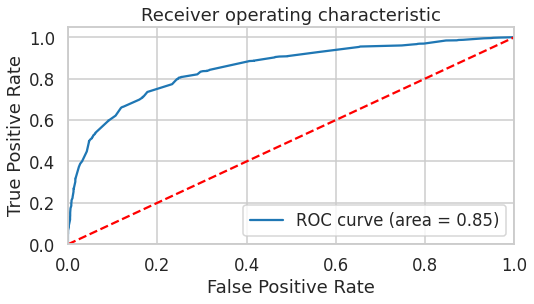

In [579]:
# Calling the roc curve for plotting

edu_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

Points to be concluded from above roc curve -
- The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
- The area under the curve is 88% of the total area.

#### Finding optimal probability cutoff point

In [580]:
# creating 10 points out of which one we will choose for our cutoff point

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.431206,1871,1,1,1,1,1,0,0,0,0,0
6795,0,0.245785,6795,1,1,1,0,0,0,0,0,0,0
3516,0,0.431206,3516,1,1,1,1,1,0,0,0,0,0
8105,0,0.718742,8105,1,1,1,1,1,1,1,1,0,0
3934,0,0.370726,3934,1,1,1,1,0,0,0,0,0,0


Now, after creating series of points let's check the possibilities of choosing any one points from 0 to 0.9. We will do this by finding **'Accuracy'**, **'Sensitivity'** and **'Specificity'** for each points. These three methods will tell us how our model is - whether it is having low accuray or high or number of relevance data points is high or low etc.

In [581]:
# Caculating accuracy, sensitivity and specificity with probability cutoffs

# importing necessary library

from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.382962    0.999594     0.002999
0.1          0.1  0.437075    0.990268     0.096202
0.2          0.2  0.502938    0.967964     0.216392
0.3          0.3  0.705937    0.882806     0.596952
0.4          0.4  0.771800    0.804947     0.751374
0.5          0.5  0.789734    0.621249     0.893553
0.6          0.6  0.781231    0.513788     0.946027
0.7          0.7  0.745826    0.373074     0.975512
0.8          0.8  0.712894    0.267234     0.987506
0.9          0.9  0.684447    0.183698     0.993003


As we can see from the above data we have created points for accuracy , sensitivity and specificity for all probability points from 0 to 0.9.
Out of this we have to choose one as a cutoff point and it is **probability cutoff = 0.4** because all the accuracy , sensitivity and specificity are having nearly same value which is an ideal point to consider for as we can't ignore any one from three.

Let's plot this data and see the convergent point or meeting point for all three point 'accuracy' , 'sensitivity' and 'specificity'

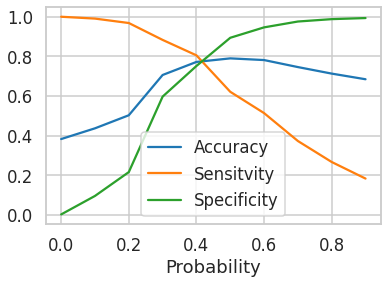

In [582]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])   # line plotting
plt.show()

From the above curve, 0.4 is the optimum point for taking probability cutoff as the meeting point is slightly before from 0.4 hence final cutoff we choose is **0.40**. Also we can see that there is a trade off between sensitivity and specificity.

In [583]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final dataset

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 

y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.431206,1871,1,1,1,1,1,0,0,0,0,0,1
6795,0,0.245785,6795,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.431206,3516,1,1,1,1,1,0,0,0,0,0,1
8105,0,0.718742,8105,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.370726,3934,1,1,1,1,0,0,0,0,0,0,0


## Precision and Recall

Let's create precision and recall using confusion matrix for the final dataset ass we know that to attain more stability and predict successfully in our model one needs to check these two important methods which not only will tell us how our model is but also it will show us some insight like what is the score for result relevancy and how many truly relevant results are returned. 

In [584]:
# Creating confusion matrix to find precision and recall score

confusion_pr=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr

array([[3007,  995],
       [ 481, 1985]])

In [585]:
print('Precision',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1]))    # Printing Pecision score
print('Recall',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1]))       # Printing Recall score

Precision 0.6661073825503355
Recall 0.8049472830494728


Important point to be noted from the outcomes for precision and recall score -
- Our precison percentage is 66% approximately and recall  percentage is 80%
- This means we have very good model which explains relevancy of 66% and true relevant results about 80%.

**As per our business objective, the recall percentage I will consider more valuable because it is okay if our precision is little low which means less hot lead customers but we don't want to left out any hot leads which are willing to get converted hence our focus on this will be more on Recall than Precision.**

### Precision and Recall trade-off

As we all know that Precision and Recall are inversely related means if one increases other will genuinely decrease. Hence we need to see the trade off between these two.
Let's check that in below graph.

In [586]:
# importing precision recall curve from sklearn library

from sklearn.metrics import precision_recall_curve

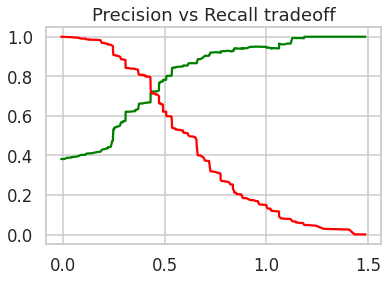

In [587]:
# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

**As we can see that there is a trade off between Precision and Recall and the meeting point is nearly at 0.7**

### RFE Test - 2

In [588]:
# Running RFE with variables 15

rfem2= RFE(logreg, n_features_to_select=15)
rfem2= rfem2.fit(X_train,y_train)
rfem2.support_

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [589]:
# selecting columns only which are 'True' in rfem.support_ i.e True columns were selected for creating a model

col2=X_train.columns[rfem2.support_]

X_train_rfe2=sm.add_constant(X_train[col2])    # Adding constant

In [590]:
# creating 1st model after RFE

logis_rfe2=sm.GLM(y_train,X_train_rfe2,family=sm.families.Binomial())

reg_rfe2=logis_rfe2.fit()

reg_rfe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2746.8
Date:                Tue, 24 Jan 2023   Deviance:                       5493.6
Time:                        15:42:32   Pearson chi2:                 6.88e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2894      0.065      4.473      0.000       0.163       0.416
Do Not Email                                            -1.3263      0.190     -6.973      0.000      -1.699      -0.954
Total Time Spent on Website                              0.9265      0.035     26.714      0.000       0.859       0.994
Lead Origin_Lead Add Form                                3.3839      0.186     18.172      0.000       3.019       3.749
Lead Source_Welingak website                             1.9606      0.743      2.638      0.008       0.504       3.417
Last Activity_Converted to Lead                         -1.1618      0.221     -5.263      0.000      -1.594      -0.729
Last Activity_Email Bounced                             -1.0321      0.336     -3.068      0.002      -1.691      -0.373
Last Activity_Olark Chat Conversation                   -0.7956      0.191     -4.168      0.000      -1.170      -0.421
What is your current occupation_Housewife               22.7265    1.4e+04      0.002      0.999   -2.74e+04    2.75e+04
What is your current occupation_Working Professional     2.7547      0.187     14.755      0.000       2.389       3.121
Last Notable Activity_Email Link Clicked                -1.7558      0.274     -6.403      0.000      -2.293      -1.218
Last Notable Activity_Email Opened                      -1.2958      0.085    -15.159      0.000      -1.463      -1.128
Last Notable Activity_Had a Phone Conversation           1.8669      1.091      1.711      0.087      -0.272       4.005
Last Notable Activity_Modified                          -1.6631      0.098    -17.055      0.000      -1.854      -1.472
Last Notable Activity_Olark Chat Conversation           -1.3184      0.370     -3.568      0.000      -2.043      -0.594
Last Notable Activity_Page Visited on Website           -1.6038      0.187     -8.582      0.000      -1.970      -1.238
========================================================================================================================
"""

Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.


## Calculating VIF

In [591]:
# Creating vif dataframe

vif=pd.DataFrame()

# adding same features as the x_train dataset have

vif['Features']=X_train_rfe2[col2].columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X_train_rfe2[col2].values,i) for i in range(X_train_rfe2[col2].shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values

vif=vif.sort_values(by='VIF',ascending=False)


vif   # Viewing the dataset

,Features,VIF
12,Last Notable Activity_Modified,1.85
0,Do Not Email,1.81
5,Last Activity_Email Bounced,1.79
6,Last Activity_Olark Chat Conversation,1.78
2,Lead Origin_Lead Add Form,1.41
13,Last Notable Activity_Olark Chat Conversation,1.32
3,Lead Source_Welingak website,1.24
4,Last Activity_Converted to Lead,1.23
8,What is your current occupation_Working Profes...,1.13
1,Total Time Spent on Website,1.09


**As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset.**

As expained before we will drop the highly in-significant features i.e **'What is your current occupation_Housewife'** having 0.999 p - value.

In [592]:
# Dropping the most insignificant values ('What is your current occupation_Housewife') and constant

X_train_rfe22=X_train_rfe2.drop(['const','What is your current occupation_Housewife'],1)

In [593]:
# Creating a new model

X_train_rfe22=sm.add_constant(X_train_rfe22)                              # Adding constant
logis_rfe22=sm.GLM(y_train,X_train_rfe22,families=sm.families.Binomial())  # Using GLM, creating model
reg_rfe22=logis_rfe22.fit()                                                 # Fitting our model
print(reg_rfe22.summary()  )                                                 # Showing the summary of the model created

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.14139
Method:                          IRLS   Log-Likelihood:                -2843.8
Date:                Tue, 24 Jan 2023   Deviance:                       912.40
Time:                        15:42:32   Pearson chi2:                     912.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Again, we can see from above summary that variable **'Last Notable Activity_Had a Phone Conversation'** is in-significant hence dropping it and recreating a new model.

In [594]:
# Dropping the most insignificant values ('Last Notable Activity_Had a Phone Conversation') and constant

X_train_rfe23=X_train_rfe22.drop(['const','Last Notable Activity_Had a Phone Conversation'],1)

In [595]:
# Creating a new model

X_train_rfe23=sm.add_constant(X_train_rfe23)                              # Adding constant
logis_rfe23=sm.GLM(y_train,X_train_rfe23,families=sm.families.Binomial())  # Using GLM, creating model
reg_rfe23=logis_rfe23.fit()                                                 # Fitting our model
print(reg_rfe23.summary())                                            # Showing the summary of the model created

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.14146
Method:                          IRLS   Log-Likelihood:                -2845.9
Date:                Tue, 24 Jan 2023   Deviance:                       913.00
Time:                        15:42:32   Pearson chi2:                     913.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Again, from above summary we can see that one variable **'Last Activity_Email Bounced '** is insignificant hence dropping from the dataset.

In [596]:
# Dropping the most insignificant values ('Last Activity_Email Bounced ') and constant

X_train_rfe24=X_train_rfe23.drop(['const','Last Activity_Email Bounced'],1)

In [597]:
# Creating a new model

X_train_rfe24=sm.add_constant(X_train_rfe24)                              # Adding constant
logis_rfe24=sm.GLM(y_train,X_train_rfe24,families=sm.families.Binomial())  # Using GLM, creating model
reg_rfe24=logis_rfe24.fit()                                                 # Fitting our model
print(reg_rfe24.summary())                                             # Showing the summary of the model created

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.14151
Method:                          IRLS   Log-Likelihood:                -2847.5
Date:                Tue, 24 Jan 2023   Deviance:                       913.45
Time:                        15:42:32   Pearson chi2:                     913.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Now, from the above summary we can say that all the variables present in this model are **significant** as variables are having p - value equal to 0 hence we can proceed with our next step.

## Creating VIF

After creating a model with no in significant features lets check the VIF i.e multicollinearity as we have checked earlier there was no such thing were found after creating VIF - all VIF vallues are less than 5 which means our **final model is ready**.

In [598]:
# Checking VIF again just to be sure

# X_train_rfe0=X_train_rfe24.drop('const',1)     # dropping constant and saving in new dataset
vif=pd.DataFrame()                             # Creating new VIF DataFrame
vif['Features']=X_train_rfe24.columns           # Adding final train dataset features

# Now calculating

vif['VIF']=[variance_inflation_factor(X_train_rfe24.values,i) for i in range(X_train_rfe24.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif dataset

vif=vif.sort_values(by='VIF',ascending=False)

vif   # viewing the dataset

,Features,VIF
0,const,4.62
10,Last Notable Activity_Modified,1.94
9,Last Notable Activity_Email Opened,1.60
6,Last Activity_Olark Chat Conversation,1.59
11,Last Notable Activity_Olark Chat Conversation,1.35
3,Lead Origin_Lead Add Form,1.33
4,Lead Source_Welingak website,1.22
5,Last Activity_Converted to Lead,1.17
12,Last Notable Activity_Page Visited on Website,1.11
2,Total Time Spent on Website,1.10


**As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset.**

### Predicting in train model

In [599]:
# Predicting the train dataset with our final model - rfe with 15 variables

y_train_pred1=reg_rfe24.predict(X_train_rfe24)

# Creating a new dataset and saving predicted values in it

y_train_pred_final2=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred1,'ID':y_train.index})

y_train_pred_final2.head()   # viewing first 5 rows


,Converted,Converted_probability,ID
1871,0,0.161631,1871
6795,0,0.308956,6795
3516,0,0.193698,3516
8105,0,0.760135,8105
3934,0,0.102970,3934


## ROC curve plotting

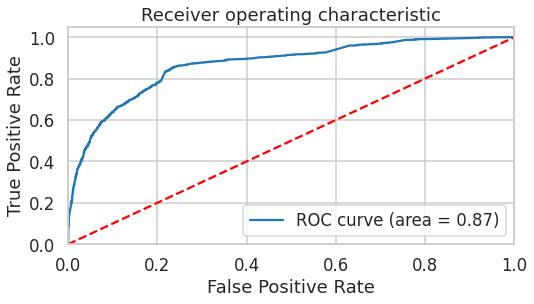

In [600]:
# Calling the roc curve function for plotting

edu_roc(y_train_pred_final2.Converted, y_train_pred_final2.Converted_probability)

Points to be concluded from above roc curve -
- The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
- The area under the curve is 87% of the total area.

## Conclusion from RFE Test - 1 & Test - 2

Important points to be drawn from both tests - 
 - For Test - 1, we saw that the auc score is 0.7 in ROC curve plot.
 - For Test - 2, we saw that the auc score is 0.87 in ROC curve plot.

As we all know that AUC measures how true postive rates and false positive rates trade-off. It tells us the model stability. The larger the area, more our model will be able to distinguish classes. Ex - For this case converted or not
Which means **the model created by RFE test - 1 is the better model or stable model than 2**.

## Prediction the test dataset

### Scaling the test dataset

In [601]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X - test dataset

X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

### Now Predicting

In [602]:
# Predicting the test dataset with our final model

test_cols=X_train_4.columns[1:]              # Taking the same column train set has
X_test_final=X_test[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=reg4.predict(X_test_final)       # Predicting the final test set

In [603]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()   # viewing first 5 rows

,Converted,Converted_Probability,ID
4269,1,0.650203,4269
2376,1,0.899467,2376
7766,1,0.735555,7766
9199,0,0.072559,9199
4359,1,0.672628,4359


### Model Evaluation

In [604]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.650203,4269,1
2376,1,0.899467,2376,1
7766,1,0.735555,7766,1
9199,0,0.072559,9199,0
4359,1,0.672628,4359,1


In [611]:
# Checking the accuracy of the train dataset.
from sklearn import metrics    # Imprting metrics from sklearn

print('Accuracy score in predicting train dataset :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy score in predicting train dataset : 0.7717996289424861


In [610]:
from sklearn.metrics import precision_score, recall_score     # Importing precision and recall score from sklearn

print('Precision score in predicting train dataset:',precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))   # Printing the precision score

print('Recall score in predicting train dataset:',recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))  

Precision score in predicting train dataset: 0.6661073825503355
Recall score in predicting train dataset: 0.8049472830494728


In [605]:
# Checking the accuracy of the test dataset.

from sklearn import metrics    # Imprting metrics from sklearn

print('Accuracy score in predicting test dataset :',metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   # Printing the score

Accuracy score in predicting test dataset : 0.8152958152958153


In [606]:
from sklearn.metrics import precision_score, recall_score     # Importing precision and recall score from sklearn

print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   # Printing the precision score

print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))      # Printing the recall score

Precision score in predicting test dataset: 0.7541412380122058
Recall score in predicting test dataset: 0.7899543378995434


## Lead Score assigning

In [607]:
# Creating new columns for lead number and lead score

y_test_pred_final['Lead Number']=edu_df1.iloc[y_test_pred_final['ID'],1]

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))


y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.650203,4269,1,619003,65
2376,1,0.899467,2376,1,636884,90
7766,1,0.735555,7766,1,590281,74
9199,0,0.072559,9199,0,579892,7
4359,1,0.672628,4359,1,617929,67


# Conclusion

Valuable Insights -
 - The Accuracy, Precision and Recall score we got from test set in aceptable range.
 - We have high recall score than precision score which we were exactly looking for.
 - In business terms, this model has an ability to adjust with the company’s requirements in coming future.
 - This concludes that the model is in stable state.
